In [1]:
from tensorflow.keras.layers import Input, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import os

INIT_LR = 1e-4
EPOCHS = 50
BS = 32

DIRECTORY = r'C:\Users\aisho\OneDrive\Desktop\data'
CATEGORIES = ['fake', 'real']

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(category)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# class vector to be converted into a matrix
data = np.array(data, dtype="float32")
labels = np.array(labels)

C:\Users\aisho\anaconda3\envs\tf_new\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [2]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [3]:
# Load pre-trained MobileNetV2 model without the top (fully connected) layers
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Construct the head of the model to be placed on top of the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# Place the head FC model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

In [81]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [4]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [5]:
for layer in baseModel.layers:
    layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS
)

[INFO] compiling model...
[INFO] training head...


C:\Users\aisho\anaconda3\envs\tf_new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
164/164 [==============================] - 99s 587ms/step - loss: 0.6457 - accuracy: 0.6632 - val_loss: 0.5082 - val_accuracy: 0.7793
Epoch 2/50
164/164 [==============================] - 81s 495ms/step - loss: 0.5497 - accuracy: 0.7283
Epoch 3/50
164/164 [==============================] - 81s 493ms/step - loss: 0.4980 - accuracy: 0.7649
Epoch 4/50
164/164 [==============================] - 81s 491ms/step - loss: 0.4721 - accuracy: 0.7760
Epoch 5/50
164/164 [==============================] - 80s 487ms/step - loss: 0.4418 - accuracy: 0.8030
Epoch 6/50
164/164 [==============================] - 88s 534ms/step - loss: 0.4241 - accuracy: 0.8145
Epoch 7/50
164/164 [==============================] - 81s 491ms/step - loss: 0.4053 - accuracy: 0.8189
Epoch 8/50
164/164 [==============================] - 80s 486ms/step - loss: 0.3825 - accuracy: 0.8317
Epoch 9/50
164/164 [==============================] - 80s 485ms/step - loss: 0.3807 - accuracy: 0.8357
Epoch 10/50
164/164 [==========

In [47]:
predIdxs = model.predict(testX, batch_size=BS)
# For each image in the testing set, we need to find the index of the
# label with the corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

42/42 [==============================] - 14s 338ms/step


In [48]:
true_labels = np.argmax(testY, axis=1)

print(classification_report(true_labels, predIdxs, target_names=lb.classes_))

              precision    recall  f1-score   support

        fake       0.94      0.91      0.93       468
        real       0.95      0.97      0.96       846

    accuracy                           0.95      1314
   macro avg       0.95      0.94      0.94      1314
weighted avg       0.95      0.95      0.95      1314



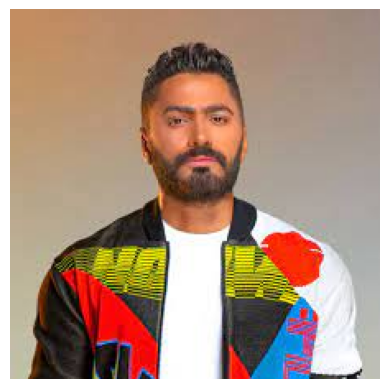

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = r"C:\Users\aisho\OneDrive\Desktop\download.jpeg"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [58]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load and preprocess the image
image_path = r"C:\Users\aisho\OneDrive\Desktop\download.jpeg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
image_array = preprocess_input(image_array.reshape(1, 224, 224, 3))

# Make predictions
predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions, axis=1)

# Convert the predicted index to class label using LabelBinarizer
predicted_class_label = lb.classes_[predicted_class_index[0]]

print(f"The predicted class is: {predicted_class_label}")

1/1 [==============================] - 0s 52ms/step
The predicted class is: real


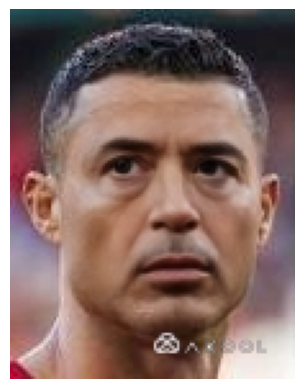

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = r"C:\Users\aisho\OneDrive\Desktop\final_images-1710263245404-4365-48f86237-ae99-4069-adde-80648cf06e10-7392.jpeg"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [83]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load and preprocess the image
image_path = r"C:\Users\aisho\OneDrive\Desktop\final_images-1710263245404-4365-48f86237-ae99-4069-adde-80648cf06e10-7392.jpeg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
image_array = preprocess_input(image_array.reshape(1, 224, 224, 3))

# Make predictions
predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions, axis=1)

# Convert the predicted index to class label using LabelBinarizer
predicted_class_label = lb.classes_[predicted_class_index[0]]

print(f"The predicted class is: {predicted_class_label}")

1/1 [==============================] - 0s 56ms/step
The predicted class is: fake


In [84]:
predictions

array([[0.50505054, 0.49494946]], dtype=float32)

In [85]:
# Save the entire model (architecture, optimizer, and learned weights)
model.save(r'D:\Gradution_project _h5model\model_u.h5')

In [28]:
from tensorflow.keras.models import load_model

loaded_model = load_model('D:\Graduation_project_model')

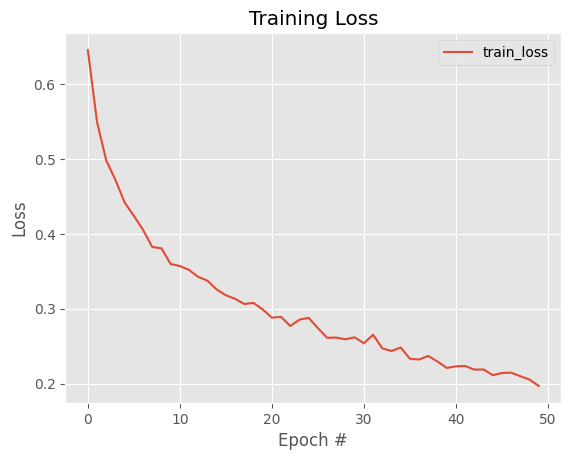

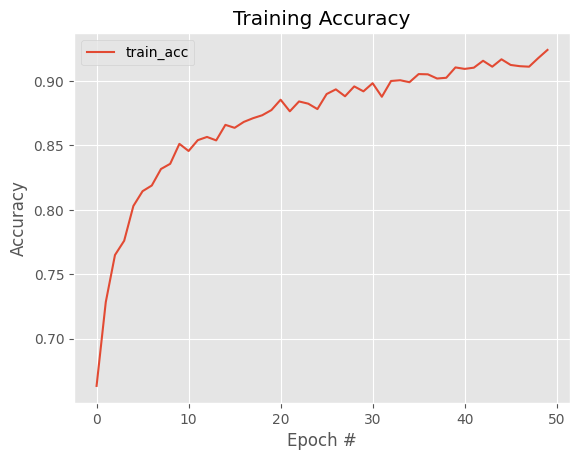

In [51]:
plt.style.use("ggplot")

# Plot training loss
plt.figure()
plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot training accuracy
plt.figure()
plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



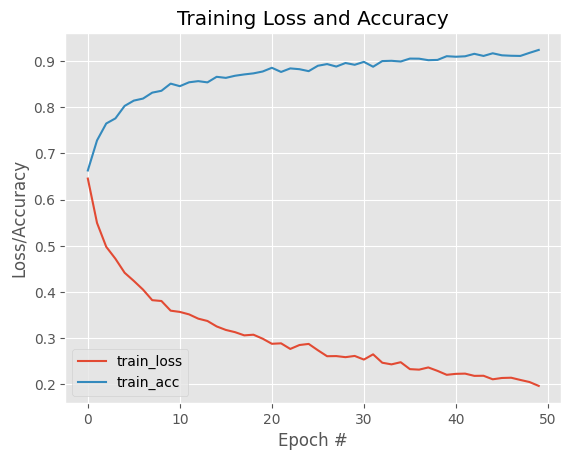

In [52]:
# Training history visualization
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

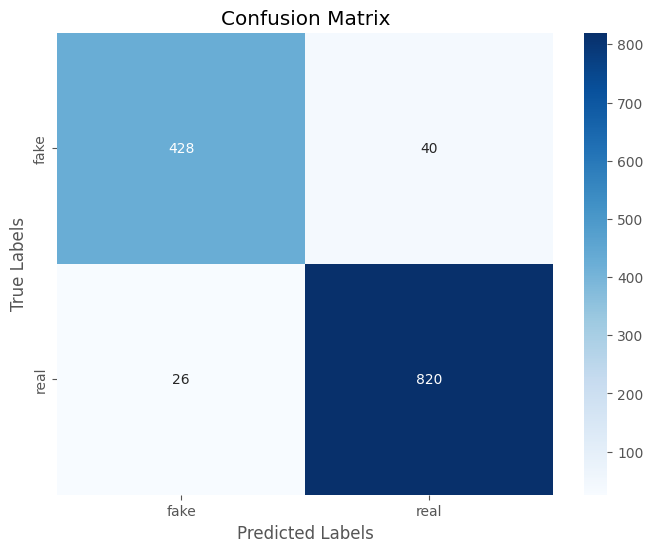

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predIdxs)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [55]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 825.8 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 1.3 MB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 991.0 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.6 MB 1.6 MB/s eta 0:00:08
    --------------------------------------- 0.2/11.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.6 MB 1.7 MB/s eta 